In [519]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import accuracy_score  
import pandas_profiling

from sklearn.tree import DecisionTreeClassifier, plot_tree

In [520]:
plt.rcParams['figure.figsize'] = (12, 6)

#This is global so if I don't specify figure size on each graph, this size is automatically assigned
#But also I can specify on each graph locally like this. plt.figure(figsize=(12,8)) and it will be overwritten

In [521]:
# split to X, and y
X = df.iloc[:,1:]
y = df['Survived']

#Why iloc[:,1:]?

In [522]:
df = pd.read_csv('train.csv', sep = ',')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [523]:
#missing value check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Use descision tree model

In [524]:
# feature engineering for numericals
numeric_features = ['Age', 'Fare']

In [525]:
numeric_transformer = make_pipeline(
    SimpleImputer(strategy="mean"), 
    StandardScaler()
    )

#Need to deep dive

In [526]:
# split to X, and y
X = df.iloc[:,1:]
y = df['Survived']

#Why iloc[:,1:]?

In [527]:
# feature engineering for categorical
categorical_features = ['Embarked', 'Sex', 'Pclass']

In [528]:
# handle unknown means it will ignore nan's if it finds them
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

#If train data has all the possible categories, even if test data doesn' have all it's no problem. Just a column which has only 0 is created.
#If train data doesn't have all the possible categories but the test data has the missing one, the data is ignored and the column is not created as train data isn't

#pd.get_dummies only creates columns which are existing cateogories in the test data(even if train data has other categories) 
#Not sure what would happen if train data has more columns than test data after pd.get_dummies and vice versa

In [529]:
# pre-process transformations
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
        #('name', FunctionTransformer(name_length), ['Name'])
    ],
    remainder='drop') 

#or passthrough. default 'drop'
#Why FunctionTransformer() has name_lengh def. How it works?
#Is it possible to specify columns which I wanna drop?

In [530]:
# create the model pipeline
pipeline = make_pipeline(preprocessor, DecisionTreeClassifier(max_depth=2, criterion='entropy'))

In [531]:
# split data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state= 42)

#random_state=42 means when I debug code, every time I get exactly same split between train data and test data
#Could be any number but same number is same split everytime every person

In [532]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Embarked', 'Sex',
                                                   'Pclass'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=2))])

## Make prediction

In [533]:
ypred = pipeline.predict(X_train)

In [534]:
ypred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [535]:
pipeline.score(X_train, y_train)

0.8108614232209738

In [536]:
pipeline.score(X_test, y_test)

0.773109243697479

In [537]:
ypred = pipeline.predict(X_test) 
accuracy_score(y_test,ypred) 
#same

0.773109243697479

## Plot the tree

In [538]:
t = plot_tree(pipeline)

NotFittedError: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

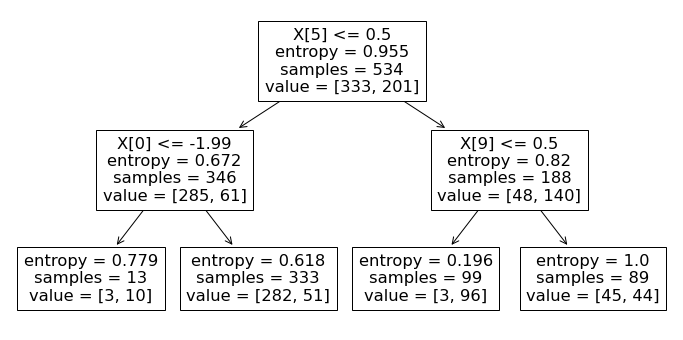

In [539]:
t= plot_tree(pipeline.named_steps['decisiontreeclassifier'])
# plot_tree(pipeline.named_steps['DecisionTreeClassifier']) doesn't work because after fitting the pipline, steps=[] is created inside of pipeline
# and have to select the decision tree model only
# and decision tree model is converted to ('decisiontreeclassifier', DecisionTreeClassifier(criterion='entropy', max_depth=5) in this pipeline
# so have to specify as 'decisiontreeclassifier'
